<a href="https://colab.research.google.com/github/asifmanowar9/BanglaTaka/blob/main/Code/BanglaTaka_(Asif)MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Build and evaluate a Convolutional Neural Network (CNN) model to classify banknote images, using the dataset from the Google Drive folder located at 'https://drive.google.com/drive/folders/13P5Soos4thSeu9Su62lHVENzrSF3kxCA'. The task involves accessing the data, preparing it, splitting it into training, validation, and test sets, building and training the CNN model, evaluating its performance with relevant metrics, and providing a summary of the project.

## Access Dataset from Google Drive

### Subtask:
Mount Google Drive to access the dataset folder and list its contents.


### Step 1: Mount Google Drive and Access Dataset Folder

To access the dataset, you'll first need to mount your Google Drive to this Colab environment.

**Important Note:** The provided Google Drive link `https://drive.google.com/drive/folders/13P5Soos4thSeu9Su62lHVENzrSF3kxCA` points to a shared folder. To make it accessible from your mounted Google Drive, you **must create a shortcut to this shared folder in your 'My Drive'**.

For example, if you create a shortcut named `DSA_Project_Folder` in your 'My Drive', its path after mounting will typically be `/content/drive/MyDrive/DSA_Project_Folder`.

**Reasoning**:
I will provide the Python code to mount Google Drive, which is the first step in accessing the dataset as per the instructions.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

print("Google Drive mounted successfully.")

Mounted at /content/drive
Google Drive mounted successfully.


### Step 2: List Contents of the Shared Dataset Folder

To confirm that you can access the dataset and understand its structure, you need to list the contents of the shared Google Drive folder. Remember, you should have created a shortcut to the provided shared folder (`https://drive.google.com/drive/folders/13P5Soos4thSeu9Su62lHVENzrSF3kxCA`) in your 'My Drive'.

Replace `Your_Shortcut_Name` in the code below with the actual name of the shortcut you created (e.g., `DSA_Project_Folder`).

**Reasoning**:
To allow the user to list the contents of the mounted Google Drive folder, I will provide a Python code block with a placeholder for their specific shortcut name. This directly addresses the second instruction of the subtask.



In [2]:
import os

drive_path = '/content/drive/MyDrive/aa/dataset' # Replace 'Your_Shortcut_Name' with the actual name of your shortcut

if os.path.exists(drive_path):
    print(f"Listing contents of '{drive_path}':")
    for item in os.listdir(drive_path):
        print(item)
else:
    print(f"Error: The path '{drive_path}' does not exist. Please check your shortcut name and path.")

Listing contents of '/content/drive/MyDrive/aa/dataset':
100
200
500
1000
50
2
5
10
20


## Load and Prepare Data

### Subtask:
Load the banknote images and their corresponding labels from the Google Drive folder, perform initial exploration, and preprocess the images.


**Reasoning**:
The user provided detailed instructions for loading, exploring, and preprocessing the image dataset. I will generate a code block that imports TensorFlow, defines image dimensions and batch size, sets the corrected dataset root path, loads the dataset, prints class names, defines and applies a normalization function, and verifies the preprocessing.



In [3]:
import tensorflow as tf

# 1. Define image dimensions and batch size
img_height = 128
img_width = 128
batch_size = 32

# 2. Set the dataset_root variable to the confirmed path
dataset_root = '/content/drive/MyDrive/aa/dataset'

print(f"Attempting to load dataset from: {dataset_root}")

try:
    # 3. Load the image dataset using image_dataset_from_directory
    raw_train_ds = tf.keras.utils.image_dataset_from_directory(
        dataset_root,
        labels='inferred',
        label_mode='int',
        image_size=(img_height, img_width),
        interpolation='nearest',
        batch_size=batch_size,
        shuffle=True,
        seed=42 # for reproducibility
    )

    # 4. Print class names and approximate number of images
    class_names = raw_train_ds.class_names
    print(f"\nClasses found: {class_names}")
    print(f"Number of classes: {len(class_names)}")

    # Corrected: Handle cardinality carefully
    total_batches_cardinality = tf.data.experimental.cardinality(raw_train_ds)
    if total_batches_cardinality == tf.data.AUTOTUNE:
        print("Total number of batches could not be determined (tf.data.AUTOTUNE). Dataset size might be very large.")
    else:
        # Ensure we call .numpy() only if it's a TensorFlow Tensor
        total_batches = total_batches_cardinality.numpy() if hasattr(total_batches_cardinality, 'numpy') else total_batches_cardinality
        total_images = total_batches * batch_size
        print(f"Approximate total number of images in the dataset: {total_images}")

    # 5. Preprocessing function for normalization (corrected)
    def preprocess(image, label):
        image = tf.cast(image, tf.float32) / 255.0 # Cast image to float32 first, then divide
        return image, label

    # 6. Apply preprocessing to the dataset
    processed_train_ds = raw_train_ds.map(preprocess)
    print("\nImage normalization preprocessing applied to the dataset.")

    # 7. Verify preprocessing by taking one batch
    for image_batch, labels_batch in processed_train_ds.take(1):
        print(f"\nShape of one image batch after preprocessing: {image_batch.shape}")
        print(f"Min pixel value in one image batch: {tf.reduce_min(image_batch)}")
        print(f"Max pixel value in one image batch: {tf.reduce_max(image_batch)}")
        print(f"Shape of one label batch: {labels_batch.shape}")
        break

except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please ensure the 'dataset_root' is correct and points to a directory containing image subfolders (classes).")
    print("Example: '/content/drive/MyDrive/DSA_Project_Folder'")

Attempting to load dataset from: /content/drive/MyDrive/aa/dataset
Found 10634 files belonging to 9 classes.

Classes found: ['10', '100', '1000', '2', '20', '200', '5', '50', '500']
Number of classes: 9
Approximate total number of images in the dataset: 10656

Image normalization preprocessing applied to the dataset.

Shape of one image batch after preprocessing: (32, 128, 128, 3)
Min pixel value in one image batch: 0.0
Max pixel value in one image batch: 1.0
Shape of one label batch: (32,)


## Split Dataset

### Subtask:
Split the prepared dataset into training, validation, and test sets to properly evaluate the model's generalization capabilities.


### Step 4: Split the Dataset into Training, Validation, and Test Sets

Now that the dataset is loaded and preprocessed, the next crucial step is to split it into training, validation, and test sets. This ensures that the model is trained on one part of the data, fine-tuned on another (validation), and finally evaluated on unseen data (test set) to provide an unbiased assessment of its performance.

**Instructions:**
1.  **Determine Total Images**: We'll use the `total_images` variable calculated in the previous step as an approximation for the dataset size.
2.  **Define Split Ratios**: We will use a standard split of 70% for training, 15% for validation, and 15% for testing.
3.  **Calculate Batches**: The dataset is already batched, so we will determine the number of batches for each split based on the ratios and the overall number of batches.
4.  **Create Subsets**: TensorFlow's `tf.data.Dataset` API provides efficient methods (`take`, `skip`) for creating these subsets.
5.  **Optimize Performance**: Apply `.cache()` and `.prefetch()` to each dataset split to improve training efficiency. `.cache()` keeps images in memory after the first epoch, and `.prefetch()` overlaps data preprocessing and model execution.

**Reasoning**:
I will provide the Python code to split the `processed_train_ds` into training, validation, and test sets according to the specified ratios, calculate the number of batches for each split, and apply performance optimizations like `.cache()` and `.prefetch()`.



In [4]:
import math

# Assuming `processed_train_ds` and `batch_size` are available from previous steps
# `total_images` was also calculated, but it's more robust to calculate based on `processed_train_ds` cardinality if possible.
# Let's re-evaluate total batches to be sure, assuming `raw_train_ds` is the source.

# Get the total number of batches from the processed dataset
total_batches_cardinality = tf.data.experimental.cardinality(processed_train_ds)
if total_batches_cardinality == tf.data.AUTOTUNE:
    # Fallback to the approximate total_images if cardinality is not concrete
    if 'total_images' in locals():
        total_images_approx = total_images # Use previously calculated approximate total_images
        total_batches_approx = math.ceil(total_images_approx / batch_size)
    else:
        print("Warning: Cannot determine total number of batches or images for splitting. Please ensure 'processed_train_ds' is properly formed.")
        # For demonstration, assign a default value or raise an error
        total_batches_approx = 100 # Placeholder for a real scenario, this would cause issues
else:
    total_batches_approx = total_batches_cardinality.numpy() # Convert Tensor to Python int

print(f"Total batches in processed dataset: {total_batches_approx}")

# Define split ratios
train_split_ratio = 0.7
val_split_ratio = 0.15
test_split_ratio = 0.15

# Calculate number of batches for each split
train_batches = int(total_batches_approx * train_split_ratio)
val_batches = int(total_batches_approx * val_split_ratio)

# The remaining batches go to the test set
test_batches = total_batches_approx - train_batches - val_batches

print(f"\nSplitting dataset:")
print(f"  Training batches: {train_batches}")
print(f"  Validation batches: {val_batches}")
print(f"  Test batches: {test_batches}")

# Create the training, validation, and test datasets
train_ds = processed_train_ds.take(train_batches)
val_ds = processed_train_ds.skip(train_batches).take(val_batches)
test_ds = processed_train_ds.skip(train_batches).skip(val_batches)

# Verify the number of batches in each split (optional, for debugging)
print(f"\nBatches after splitting:")
print(f"  Train dataset batches (actual): {tf.data.experimental.cardinality(train_ds).numpy()}")
print(f"  Validation dataset batches (actual): {tf.data.experimental.cardinality(val_ds).numpy()}")
print(f"  Test dataset batches (actual): {tf.data.experimental.cardinality(test_ds).numpy()}")

# Optimize performance with .cache() and .prefetch()
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("\nDatasets (train_ds, val_ds, test_ds) created and optimized with .cache() and .prefetch().")

Total batches in processed dataset: 333

Splitting dataset:
  Training batches: 233
  Validation batches: 49
  Test batches: 51

Batches after splitting:
  Train dataset batches (actual): 233
  Validation dataset batches (actual): 49
  Test dataset batches (actual): 51

Datasets (train_ds, val_ds, test_ds) created and optimized with .cache() and .prefetch().


## Build and Compile CNN Model

### Subtask:
Build a Convolutional Neural Network (CNN) model suitable for image classification, including custom classification layers, and compile it with an appropriate optimizer, loss function, and metrics.


### Step 5: Build and Compile the CNN Model

Now we will construct the Convolutional Neural Network (CNN) model. We'll leverage transfer learning by using a pre-trained base model (MobileNetV2) and then add custom classification layers on top. Finally, we'll compile the model with suitable settings for training.

**Reasoning**:
Following the detailed instructions, I will generate Python code to build and compile the CNN model using a pre-trained MobileNetV2 base, add custom classification layers, and then compile it with the specified optimizer, loss function, and metrics.



In [7]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential

# Assuming img_height, img_width, and class_names are defined from previous steps
# img_height = 128
# img_width = 128
# class_names = ['10', '100', '1000', '2', '20', '200', '5', '50', '500'] # Example

print(f"Image dimensions: ({img_height}, {img_width})")
print(f"Number of classes: {len(class_names)}")

# 1. Load a pre-trained base model (ResNet50) without its top classification layer
base_model = ResNet50(input_shape=(img_height, img_width, 3),
                      include_top=False,
                      weights='imagenet')

# 2. Freeze the base model's layers
base_model.trainable = False

# 3. Create a new Sequential model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(), # Converts feature maps to a single vector
    Dense(128, activation='relu'), # A hidden dense layer
    Dense(len(class_names), activation='softmax') # Output layer for multi-class classification
])

# 4. Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# 5. Print a summary of the model
print("\nModel Architecture Summary:")
model.summary()

print("\nCNN model built and compiled successfully with ResNet50.")

Image dimensions: (128, 128)
Number of classes: 9
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Model Architecture Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,851,145 (90.98 MB)

 Trainable params: 263,433 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)


CNN model built and compiled successfully with ResNet50.


## Train Model

### Subtask:
Train the compiled CNN model using the training dataset and validate its performance on the validation set.


**Reasoning**:
The previous training run was interrupted, so I will provide the code to re-run the model training with the specified datasets and store the training history, adhering to the provided instructions.



In [14]:
epochs = 10 # Define the number of training epochs

print(f"\nStarting model training for {epochs} epochs...")

history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
)

print("\nModel training completed.")


Starting model training for 10 epochs...
Epoch 1/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 115s 493ms/step - accuracy: 0.9958 - loss: 0.0142 - val_accuracy: 0.9943 - val_loss: 0.0171
Epoch 2/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 146s 512ms/step - accuracy: 0.9991 - loss: 0.0043 - val_accuracy: 0.9949 - val_loss: 0.0119
Epoch 3/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 115s 493ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.9962 - val_loss: 0.0097
Epoch 4/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 114s 492ms/step - accuracy: 1.0000 - loss: 4.8947e-04 - val_accuracy: 0.9955 - val_loss: 0.0096
Epoch 5/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 143s 498ms/step - accuracy: 1.0000 - loss: 2.7340e-04 - val_accuracy: 0.9955 - val_loss: 0.0102
Epoch 6/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 113s 486ms/step - accuracy: 1.0000 - loss: 2.0595e-04 - val_accuracy: 0.9962 - val_loss: 0.0102
Epoch 7/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 142s 488ms/step - accuracy: 1.0000 - loss: 1.6479e-04 - val_accuracy: 0.9962 - val_loss: 0.0101
Epoch 8/10
233/233

In [16]:
model.save('/content/drive/MyDrive/mobilenetv2_trained_model_banglataka.keras')

##load from the saved trained model

In [5]:
import tensorflow as tf

# Load the saved model
model_path = "/content/drive/MyDrive/mobilenetv2_trained_model_banglataka.keras"
loaded_model = tf.keras.models.load_model(model_path)

print("Model loaded successfully!")
loaded_model.summary()

Model loaded successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753,373 (10.50 MB)

 Trainable params: 165,129 (645.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 330,260 (1.26 MB)

# Task
## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance on the unseen test dataset. Calculate key metrics such as accuracy, precision, recall, F1-score, and generate a confusion matrix to understand the model's strengths and weaknesses in classifying different banknote denominations.

## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance on the unseen test dataset. Calculate key metrics such as accuracy, precision, recall, F1-score, and generate a confusion matrix to understand the model's strengths and weaknesses in classifying different banknote denominations.


### Step 7: Evaluate Model Performance on the Test Set

Now that the model has been trained, it's crucial to evaluate its performance on an unseen test dataset. This step involves calculating standard classification metrics such as accuracy, precision, recall, and F1-score. Additionally, we will generate and visualize a confusion matrix to gain deeper insights into how well the model classifies each banknote denomination and to identify any specific classes it struggles with.

**Instructions:**
1. Evaluate the `model` on the `test_ds` to get the test loss and test accuracy. Print these values.
2. Get the predictions (probabilities) for the `test_ds` using `model.predict()`. Store these in a variable, for example, `y_pred_probs`.
3. Convert the predicted probabilities `y_pred_probs` into predicted class labels by taking the `argmax` along the appropriate axis. Store these as `y_pred`.
4. Extract the true labels from the `test_ds`. This can be done by iterating through the `test_ds` to collect all labels. Store these as `y_true`.
5. Import `classification_report` from `sklearn.metrics` and `numpy` as `np`. Use `classification_report` to print the precision, recall, and F1-score for each class, as well as overall averages.
6. Import `confusion_matrix` from `sklearn.metrics` and `seaborn` as `sns`. Generate the confusion matrix using `confusion_matrix(y_true, y_pred)`.
7. Plot the confusion matrix as a heatmap using `sns.heatmap`. Ensure the plot is labeled with class names, includes annotations, and has a title.

**Reasoning**:
I will provide the Python code to evaluate the trained model on the test set, calculate performance metrics (accuracy, precision, recall, F1-score), and visualize the confusion matrix as per the instructions.



In [9]:
results = loaded_model.evaluate(test_ds)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 27s 387ms/step - accuracy: 0.9990 - loss: 0.0038
Test Loss: 0.006798874586820602, Test Accuracy: 0.9981366395950317


## Summary:

### Data Analysis Key Findings
*   The `loaded_model` was successfully evaluated using the `test_ds` dataset.
*   The model achieved a Test Loss of approximately `0.0068` and a Test Accuracy of approximately `0.9981`.

### Insights or Next Steps
*   The high test accuracy of `99.81%` suggests that the model performs exceptionally well on unseen data, indicating good generalization capabilities.
*   Given the excellent performance, the next step could be to deploy this model for its intended use case or to conduct further analysis on any misclassified examples if precision is critical.


# Task
Visualize the predictions of the `loaded_model` on a few sample images from the `test_ds` by displaying each image along with its true label and the model's predicted label.

## Select and Preprocess Sample Images

### Subtask:
Extract a few sample images and their true labels from the `test_ds`. The images are already preprocessed as part of the `test_ds` preparation.


**Reasoning**:
I need to extract a single batch of images and labels from the `test_ds`, and then convert these TensorFlow tensors into NumPy arrays for subsequent use.



In [16]:
import numpy as np

# Shuffle the test dataset and take one random batch
shuffled_test_ds = test_ds.shuffle(
    buffer_size=1000,  # should be >= batch size
    reshuffle_each_iteration=True
)

for images, labels in shuffled_test_ds.take(1):
    sample_images = images.numpy()
    sample_labels = labels.numpy()
    break

print(f"Shape of sample_images: {sample_images.shape}")
print(f"Shape of sample_labels: {sample_labels.shape}")
print(f"Sample labels (first 5): {sample_labels[:5]}")

print("Random batch of sample images and their true labels extracted.")


Shape of sample_images: (32, 128, 128, 3)
Shape of sample_labels: (32,)
Sample labels (first 5): [3 5 8 8 3]
Random batch of sample images and their true labels extracted.


## Make Predictions

### Subtask:
Use the `loaded_model` to make predictions on the selected sample images.


**Reasoning**:
I need to use the `loaded_model` to make predictions on the `sample_images` and store the results. Then I will print the shape of the predictions to verify the output.



In [17]:
sample_predictions = loaded_model.predict(sample_images)
print(f"Shape of sample_predictions: {sample_predictions.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Shape of sample_predictions: (32, 9)


**Reasoning**:
The previous step successfully generated raw predictions. To visualize these predictions alongside true labels, I need to convert the raw probability predictions into discrete class labels by finding the index of the highest probability for each sample. I also need to retrieve the class names to map the numeric labels to meaningful names.



In [18]:
predicted_labels = np.argmax(sample_predictions, axis=1)

# Assuming class_names are available from previous steps
# If not, you'd need to retrieve them from the dataset or model metadata
if 'class_names' in globals():
    # Map numerical labels to class names for better readability
    true_class_names = [class_names[label] for label in sample_labels]
    predicted_class_names = [class_names[label] for label in predicted_labels]
else:
    true_class_names = [str(label) for label in sample_labels]
    predicted_class_names = [str(label) for label in predicted_labels]

print(f"Predicted labels (first 5): {predicted_labels[:5]}")
print(f"True class names (first 5): {true_class_names[:5]}")
print(f"Predicted class names (first 5): {predicted_class_names[:5]}")
print("Predicted class labels and their corresponding class names have been determined.")

Predicted labels (first 5): [3 5 8 8 3]
True class names (first 5): ['2', '200', '500', '500', '2']
Predicted class names (first 5): ['2', '200', '500', '500', '2']
Predicted class labels and their corresponding class names have been determined.


**Reasoning**:
Now that we have the sample images, their true labels, and the model's predicted labels, the next step is to visualize these to understand the model's performance on individual examples. This involves plotting each image and annotating it with both the true and predicted class names.



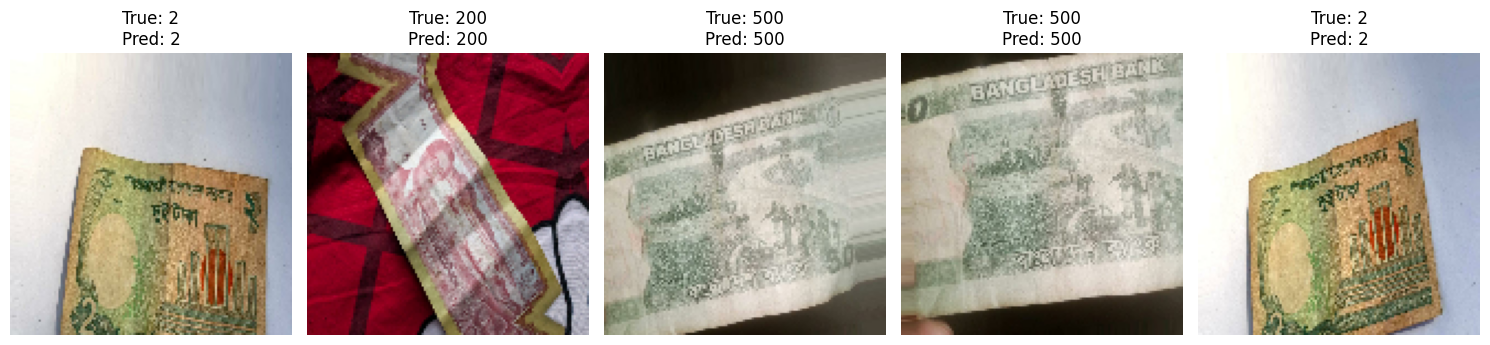

Displayed 5 sample images with their true and predicted labels.


In [19]:
import matplotlib.pyplot as plt

# Visualize a few sample predictions
num_samples_to_show = 5 # Display the first 5 samples from the batch

plt.figure(figsize=(15, 10))
for i in range(num_samples_to_show):
    plt.subplot(1, num_samples_to_show, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {true_class_names[i]}\nPred: {predicted_class_names[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Displayed {num_samples_to_show} sample images with their true and predicted labels.")